In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensemble Learning

Uczymu kilka klasyfikatorów a następnie robimy komitet (voting classifier)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

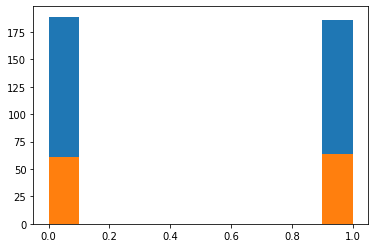

In [13]:
plt.hist(y_train)
plt.hist(y_test)
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf1 = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [15]:
voting_clf1.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

* Możemy nauczyć każdy z klasyfikatorów osobna.
* POłączenie kilku klasyfikatoór daje nam lepszy wynik.

In [16]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf1):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


# Soft voting

* Jeśli wszystkie klasyfikatory są w stanie oszacować prawdopodobieństwa klasy (tj. mają metodę **predict_proba()**), możesz przewidzieć klasę z najwyższym prawdopodobieństwem, uśrednioną dla wszystkich klasyfikatorów. 
* Nazywa się to miękkim głosowaniem (**soft voting**). 
* Często osiąga wyższą wydajność niż twarde głosowanie, ponieważ daje większą wagę do bardzo pewnych głosów. 
* Wszystko, co musisz zrobić, to zastąpić **voting="hard"** przez **voting="soft"** i upewnić się, że wszystkie klasyfikatory mogą oszacować prawdopodobieństwa klasowe. 
* Tak nie jest w przypadku SVC, więc musisz ustawić **probability** na **True**

In [17]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf2 = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='soft')
voting_clf2.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [18]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf2):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


# Zad.

Narysuj granice decyzyjne poszczegulnych klasyfikatorów oraz komitetu.

In [19]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


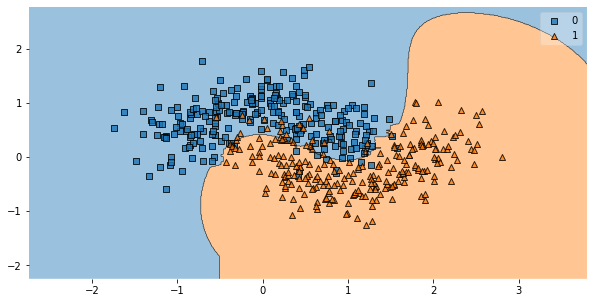

In [20]:
plt.figure(figsize=(10, 5))
plot_decision_regions(X, y, voting_clf1)
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


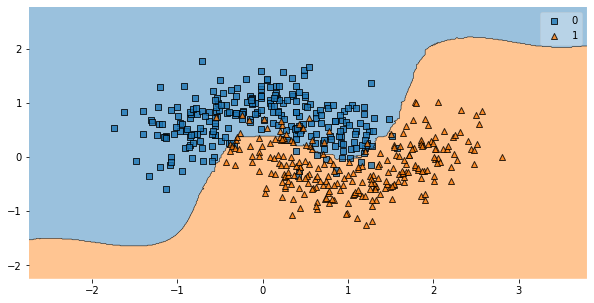

In [21]:
plt.figure(figsize=(10, 5))
plot_decision_regions(X, y, voting_clf2)
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

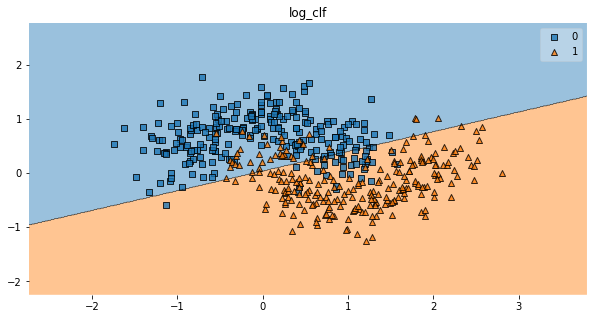

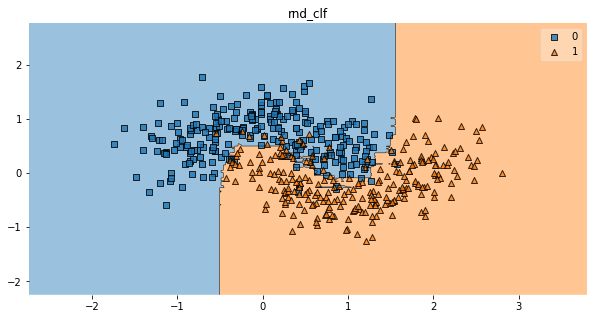

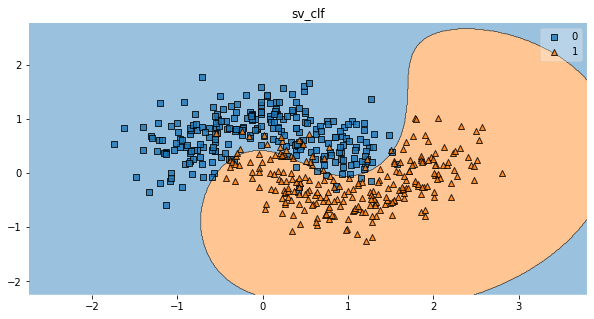

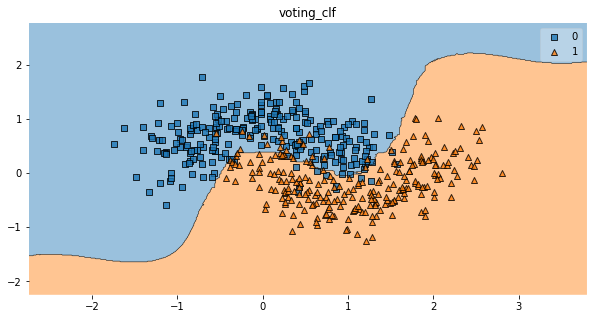

In [24]:
clfs=[log_clf, rnd_clf, svm_clf, voting_clf]
clfs_names=['log_clf', 'rnd_clf', 'sv_clf', 'voting_clf']
for i in range(len(clfs)):
  plt.figure(figsize=(10,5))
  plot_decision_regions(X,y,clfs[i])
  plt.title(clfs_names[i])
  plt.show